### Dependencies

In [1]:
import random
import time

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm

rnd_seed_state = 1

### Configuration

In [2]:
    
def pre_config():
    plt.rcParams.update({'font.size': 20})
    random.seed(rnd_seed_state)
    %matplotlib inline
    

In [3]:
pre_config()

### Loading dataset

In [4]:
def load_dataset():
    df_etf = pd.read_csv('dataset/ETFs.csv', index_col=False)
    df_mf = pd.read_csv('dataset/Mutual Funds.csv', index_col=False)

    return df_etf, df_mf

In [5]:
df_etf, df_mf = load_dataset()

C:\Users\NVukobrat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (20,22,23,119,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


### ETFs Visualization

In [6]:
def types(df):
    for c, t in zip(df, df.dtypes):
        if np.issubdtype(t, np.number):
            print("Num", c, t)
        else:
            print("Str", c, t)

In [7]:
types(df_etf)

Str fund_name object
Str fund_extended_name object
Str category object
Str fund_family object
Num net_assets float64
Num ytd_return float64
Num fund_yield float64
Str legal_type object
Str investment object
Str size object
Str currency object
Num net_annual_expense_ratio_fund float64
Num net_annual_expense_ratio_category float64
Num portfolio_stocks float64
Num portfolio_bonds float64
Num price_earnings float64
Num price_book float64
Num price_sales float64
Num price_cashflow float64
Num basic_materials float64
Num consumer_cyclical float64
Num financial_services float64
Num real_estate float64
Num consumer_defensive float64
Num healthcare float64
Num utilities float64
Num communication_services float64
Num energy float64
Num industrials float64
Num technology float64
Num rating_us_government float64
Num rating_aaa float64
Num rating_aa float64
Num rating_a float64
Num rating_bbb float64
Num rating_bb float64
Num rating_b float64
Num rating_below_b float64
Num rating_others float64
Num

In [8]:
def describe(df):
    print("DataFrame summary:")
    print(df.info())
    print()

    print("Columns summary:")
    for col in list(df):
        print(col)
        print(df[col].dropna().describe())
        print(df[col].dropna().value_counts())
        print()
  

In [9]:
describe(df_etf)

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Columns: 104 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(94), object(10)
memory usage: 1.9+ MB
None

Columns summary:
fund_name
count     2352
unique    2352
top        QQQ
freq         1
Name: fund_name, dtype: object
QQQ     1
JPST    1
SPUU    1
UYG     1
PY      1
       ..
EMLP    1
QDEF    1
PSCT    1
EQRR    1
YANG    1
Name: fund_name, Length: 2352, dtype: int64

fund_extended_name
count                              2352
unique                             2340
top       iShares MSCI Frontier 100 ETF
freq                                  2
Name: fund_extended_name, dtype: object
iShares MSCI Frontier 100 ETF                       2
CSOP FTSE China A50 ETF                             2
iShares Russell 2000 ETF                            2
iShares Core High Dividend ETF                      2
SPDR Gold Shares                                    2
                   

count    2348.000000
mean        5.090801
std         9.945021
min         0.000000
25%         0.000000
50%         0.000000
75%         7.932500
max       100.000000
Name: consumer_defensive, dtype: float64
0.00     1175
7.77        7
8.96        5
3.65        5
8.52        5
         ... 
38.78       1
13.92       1
43.92       1
27.48       1
5.07        1
Name: consumer_defensive, Length: 815, dtype: int64

healthcare
count    2348.000000
mean        6.518727
std        14.562285
min         0.000000
25%         0.000000
50%         0.000000
75%         9.432500
max       100.000000
Name: healthcare, dtype: float64
0.00      1185
100.00      19
14.49        7
9.80         5
11.43        4
          ... 
6.85         1
2.45         1
6.73         1
6.46         1
11.00        1
Name: healthcare, Length: 860, dtype: int64

utilities
count    2348.000000
mean        3.428616
std        10.072451
min         0.000000
25%         0.000000
50%         0.000000
75%         3.342500
max  

count    1010.000000
mean       -7.376644
std        16.592055
min       -67.970000
25%       -16.185000
50%        -4.815000
75%         2.112500
max       105.410000
Name: fund_return_2011, dtype: float64
 2.06     4
-2.87     3
-10.98    3
-4.26     3
-8.16     3
         ..
 1.30     1
 9.28     1
-1.84     1
 1.36     1
-24.75    1
Name: fund_return_2011, Length: 896, dtype: int64

fund_return_2010
count    852.000000
mean      11.853991
std       20.028206
min      -78.790000
25%        4.122500
50%       14.015000
75%       22.462500
max      173.630000
Name: fund_return_2010, dtype: float64
 26.36    3
 12.32    3
 26.76    3
 14.93    3
 9.29     3
         ..
 17.80    1
 3.41     1
 31.56    1
 16.59    1
-2.00     1
Name: fund_return_2010, Length: 786, dtype: int64

fund_alpha_3years
count    2251.000000
mean       -0.397375
std         6.054392
min       -65.680000
25%        -1.595000
50%         0.000000
75%         0.970000
max        53.170000
Name: fund_alpha_3years, 

Name: category_sharpe_ratio_10years, dtype: int64

fund_treynor_ratio_3years
count     2251
unique    1248
top          0
freq       461
Name: fund_treynor_ratio_3years, dtype: object
0        461
6.4        6
10.54      6
10.16      6
5.84       6
        ... 
12.44      1
-5.5       1
9.47       1
1.97       1
3.87       1
Name: fund_treynor_ratio_3years, Length: 1248, dtype: int64

category_treynor_ratio_3years
count    1451.000000
mean        4.087850
std        22.587484
min      -240.930000
25%        -0.050000
50%         4.510000
75%        10.380000
max        52.260000
Name: category_treynor_ratio_3years, dtype: float64
 10.38    114
 11.86     81
-2.11      69
 1.18      51
 11.90     48
         ... 
 6.40       3
 5.11       1
 5.35       1
 7.13       1
 10.69      1
Name: category_treynor_ratio_3years, Length: 79, dtype: int64

fund_treynor_ratio_5years
count    2162.000000
mean        2.531253
std        21.427333
min      -152.300000
25%         0.000000
50%         0.

In [10]:
def hist_bar_plot(df, rc_num=(2, 6), size=(16 * 3, 9 * 3), unique=True):
    # Chose adequate columns for visualization
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if 1 < num_unique_col[col] < 50]]

    # Create Hist and Bar plots
    plt.figure(figsize=size)
    for i, col in enumerate(df):
        plt.subplot(rc_num[0], rc_num[1], i + 1)
        df_column = df[col]
        if np.issubdtype(type(df_column.iloc[0]), np.number):
            df_column.hist()
        else:
            df_column.value_counts().plot.bar()
        plt.title(col, fontsize=25)
        plt.xticks(rotation=30, fontsize=30)
        plt.yticks(fontsize=30)
        plt.ylabel('counts')

        if i == 10:
            break
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

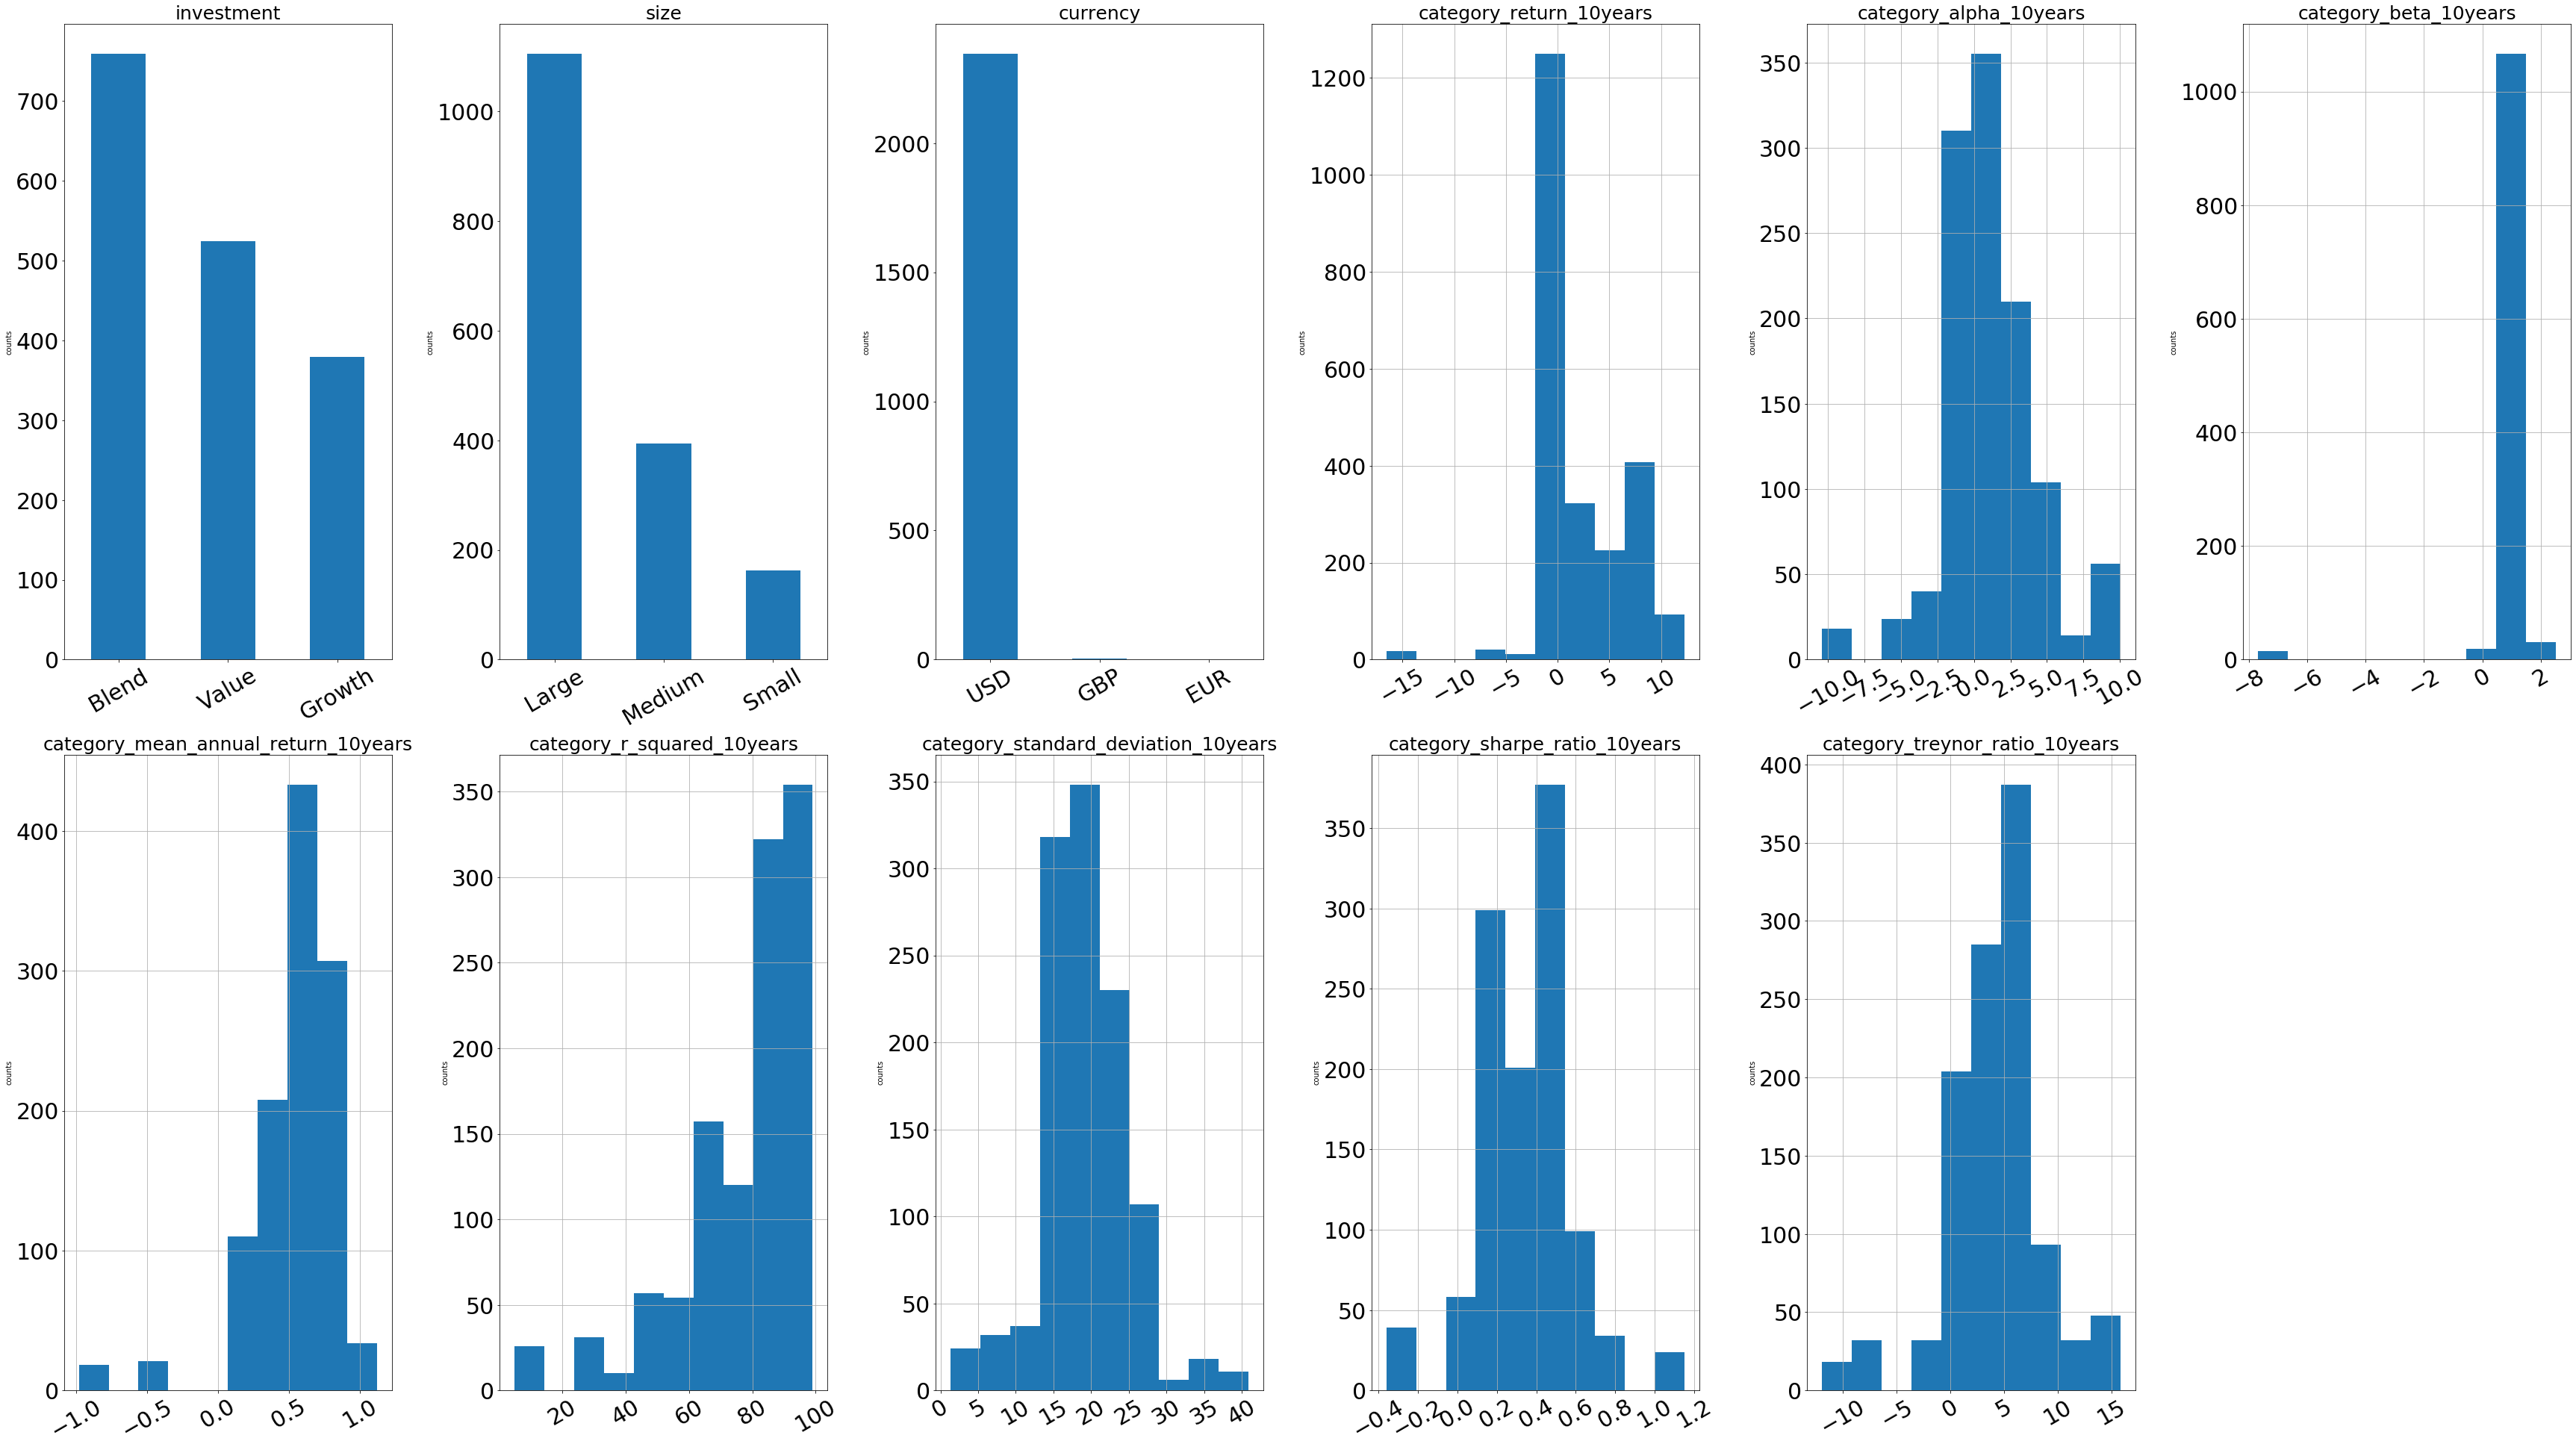

In [11]:
hist_bar_plot(df_etf)

In [12]:
def correlation_clean(df, threshold=(-0.9, -0.3, 0.3, 0.9)):
    # Fix for non-numerical (or too many nan) columns
    col_corr = {
        # ETFs
        'fund_name', 'fund_extended_name', 'category', 'fund_family', 'net_assets', 'legal_type', 'investment', 'size',
        'currency', 'rating_us_government', 'fund_treynor_ratio_3years', 'category_treynor_ratio_5years',
    }
    try:
        for col in col_corr:
            del df[col]
    except KeyError:
        pass  # legal_type

    # Chose numerical columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (not threshold[0] <= corr_matrix.iloc[i, j] <= threshold[1] and
                not threshold[2] <= corr_matrix.iloc[i, j] <= threshold[3]
            ) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname]

    return df

In [13]:
df_etf = correlation_clean(df_etf)

In [14]:
def corr_mtx(df, fig_size=50, unique=True):
    sns.set(font_scale=4.0)
    # Chose adequate columns for visualization
    if unique:
        num_unique_col = df.nunique()
        df = df[[col for col in df if num_unique_col[col] > 1]]

    f, ax = plt.subplots(figsize=(fig_size, fig_size))
    corr = df.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    plt.show()
    sns.set(font_scale=2.0)
    

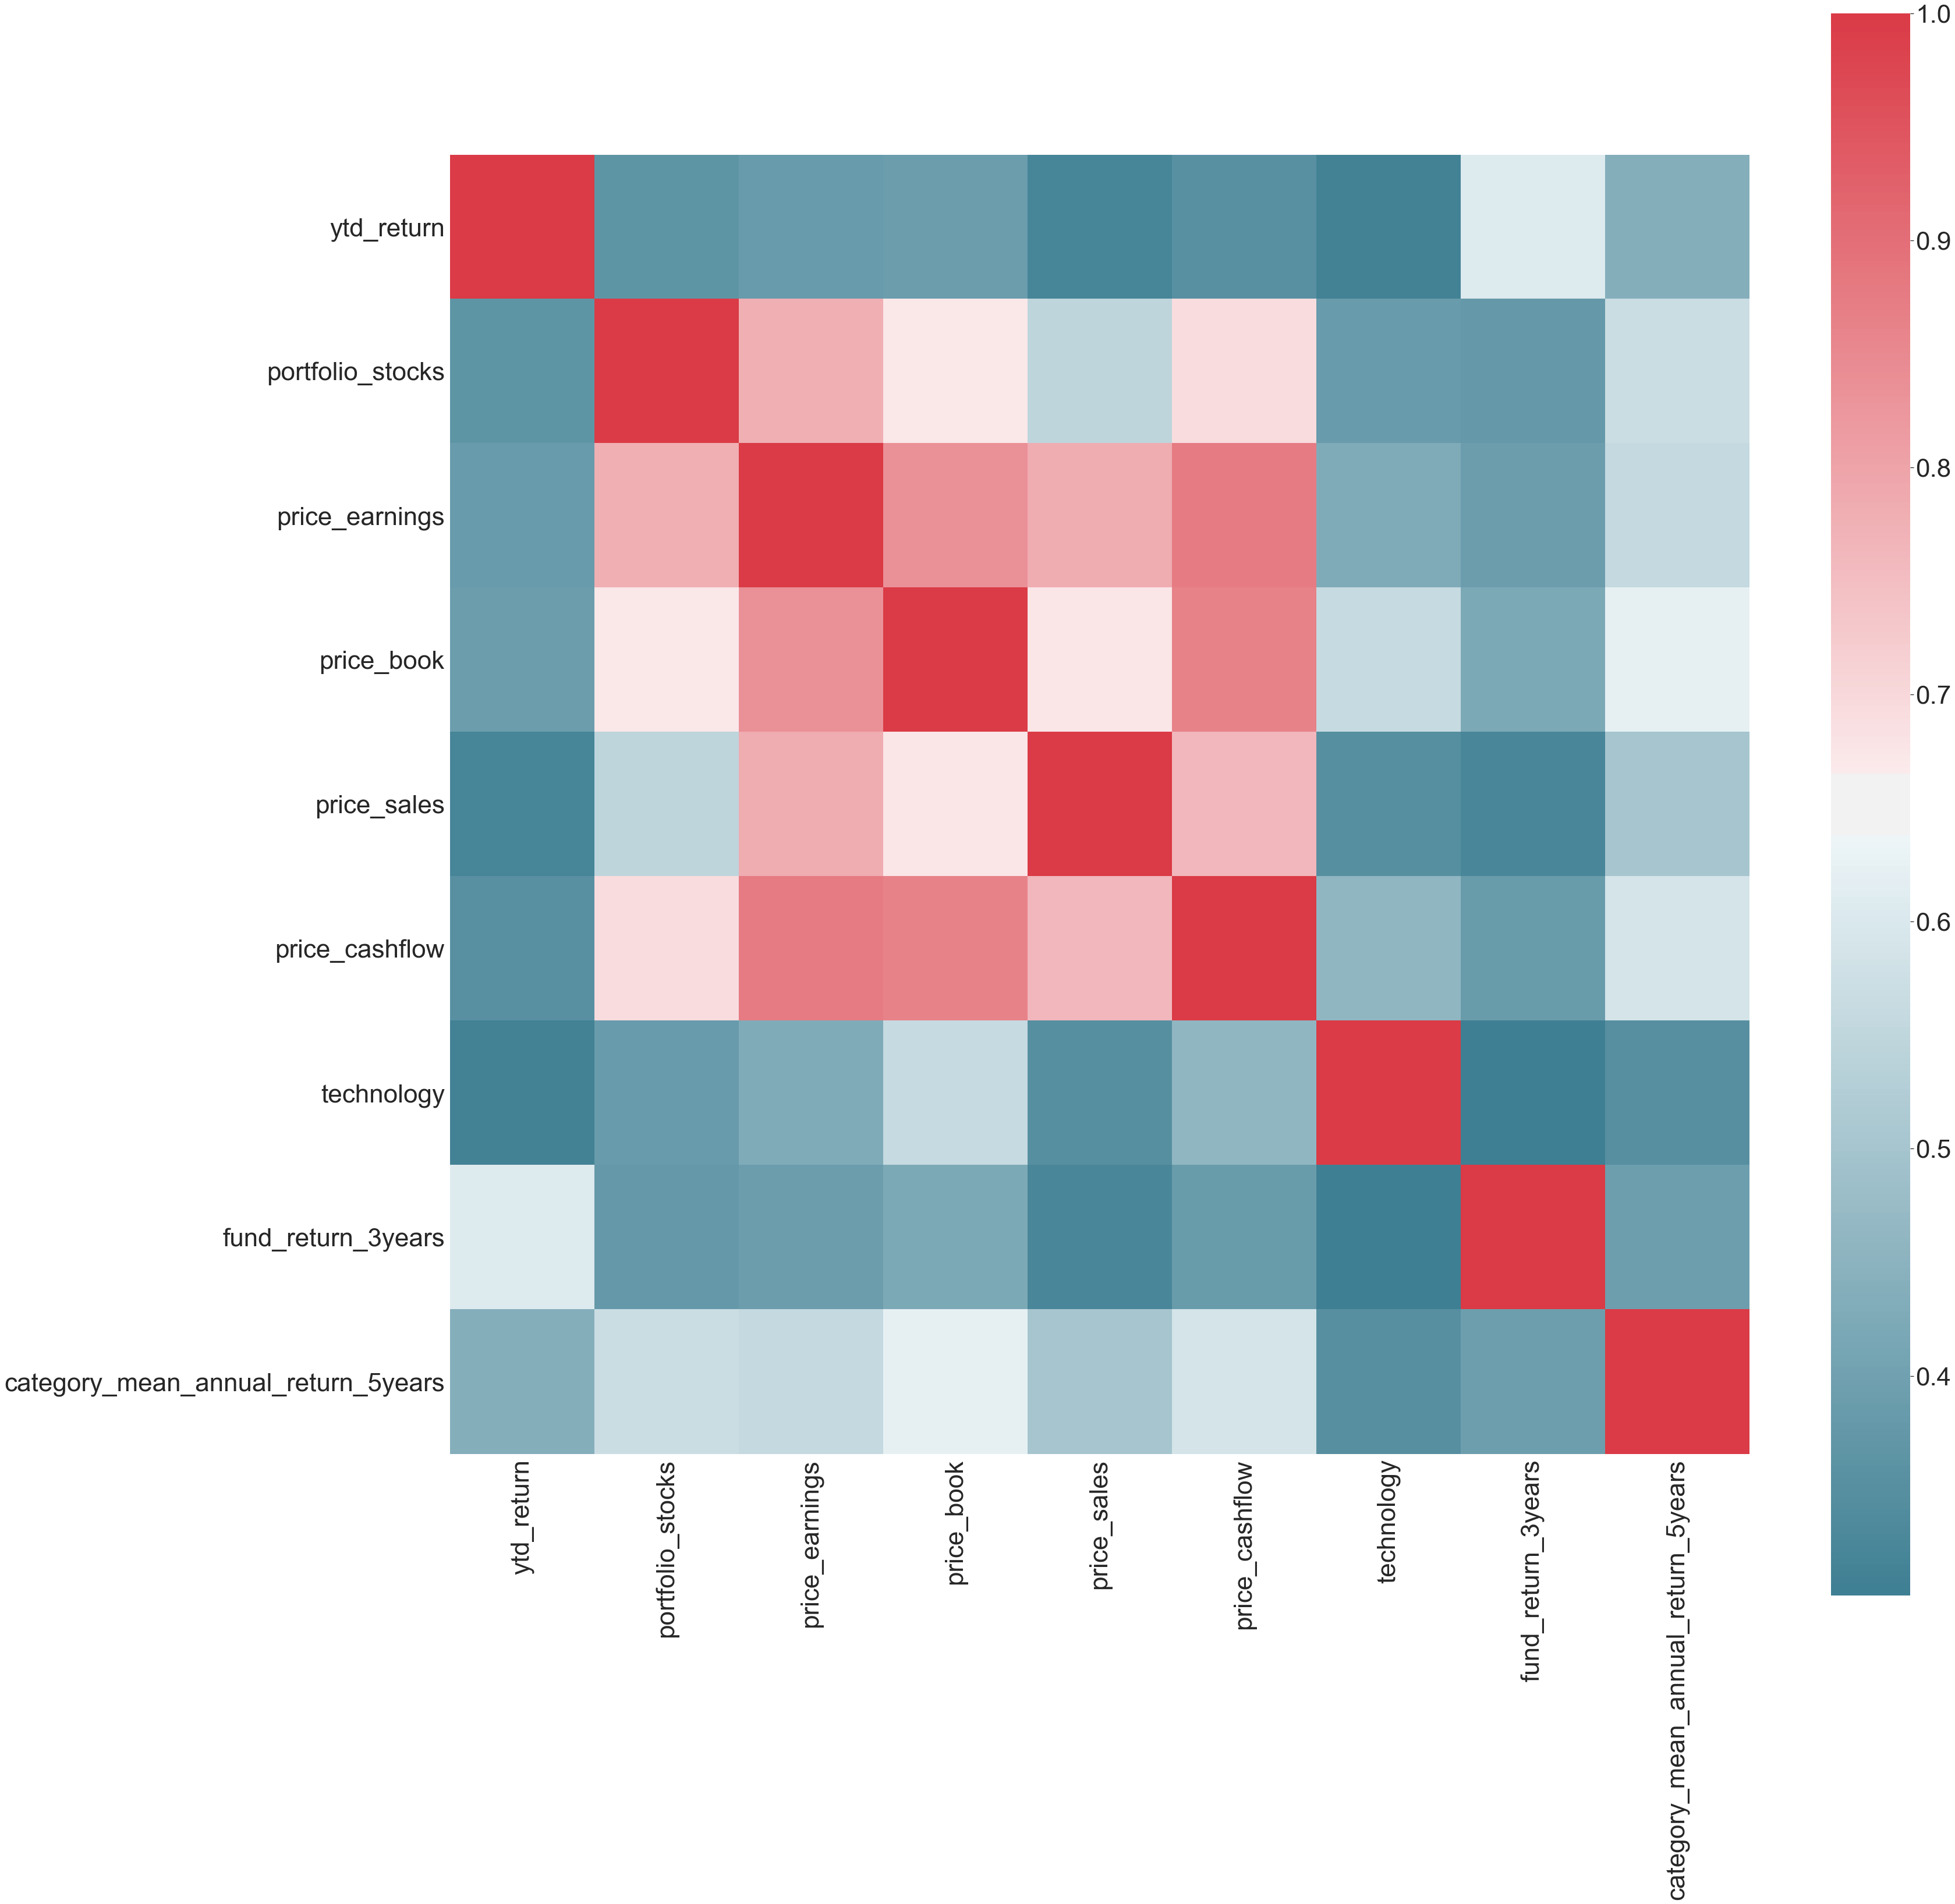

In [15]:
corr_mtx(df_etf, unique=False)

In [16]:
def scatter_mtx(df, figsize=50, cap=10):
    df = df.select_dtypes(np.number)
    if len(list(df)) > cap:
        df = df[list(df)[:cap]]
    scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(figsize, figsize), diagonal='kde')
    for ax in scatter_matrix.ravel():
        ax.set_xlabel(ax.get_xlabel(), fontsize=30, rotation=90)
        ax.set_ylabel(ax.get_ylabel(), fontsize=30, rotation=0)
    plt.show()

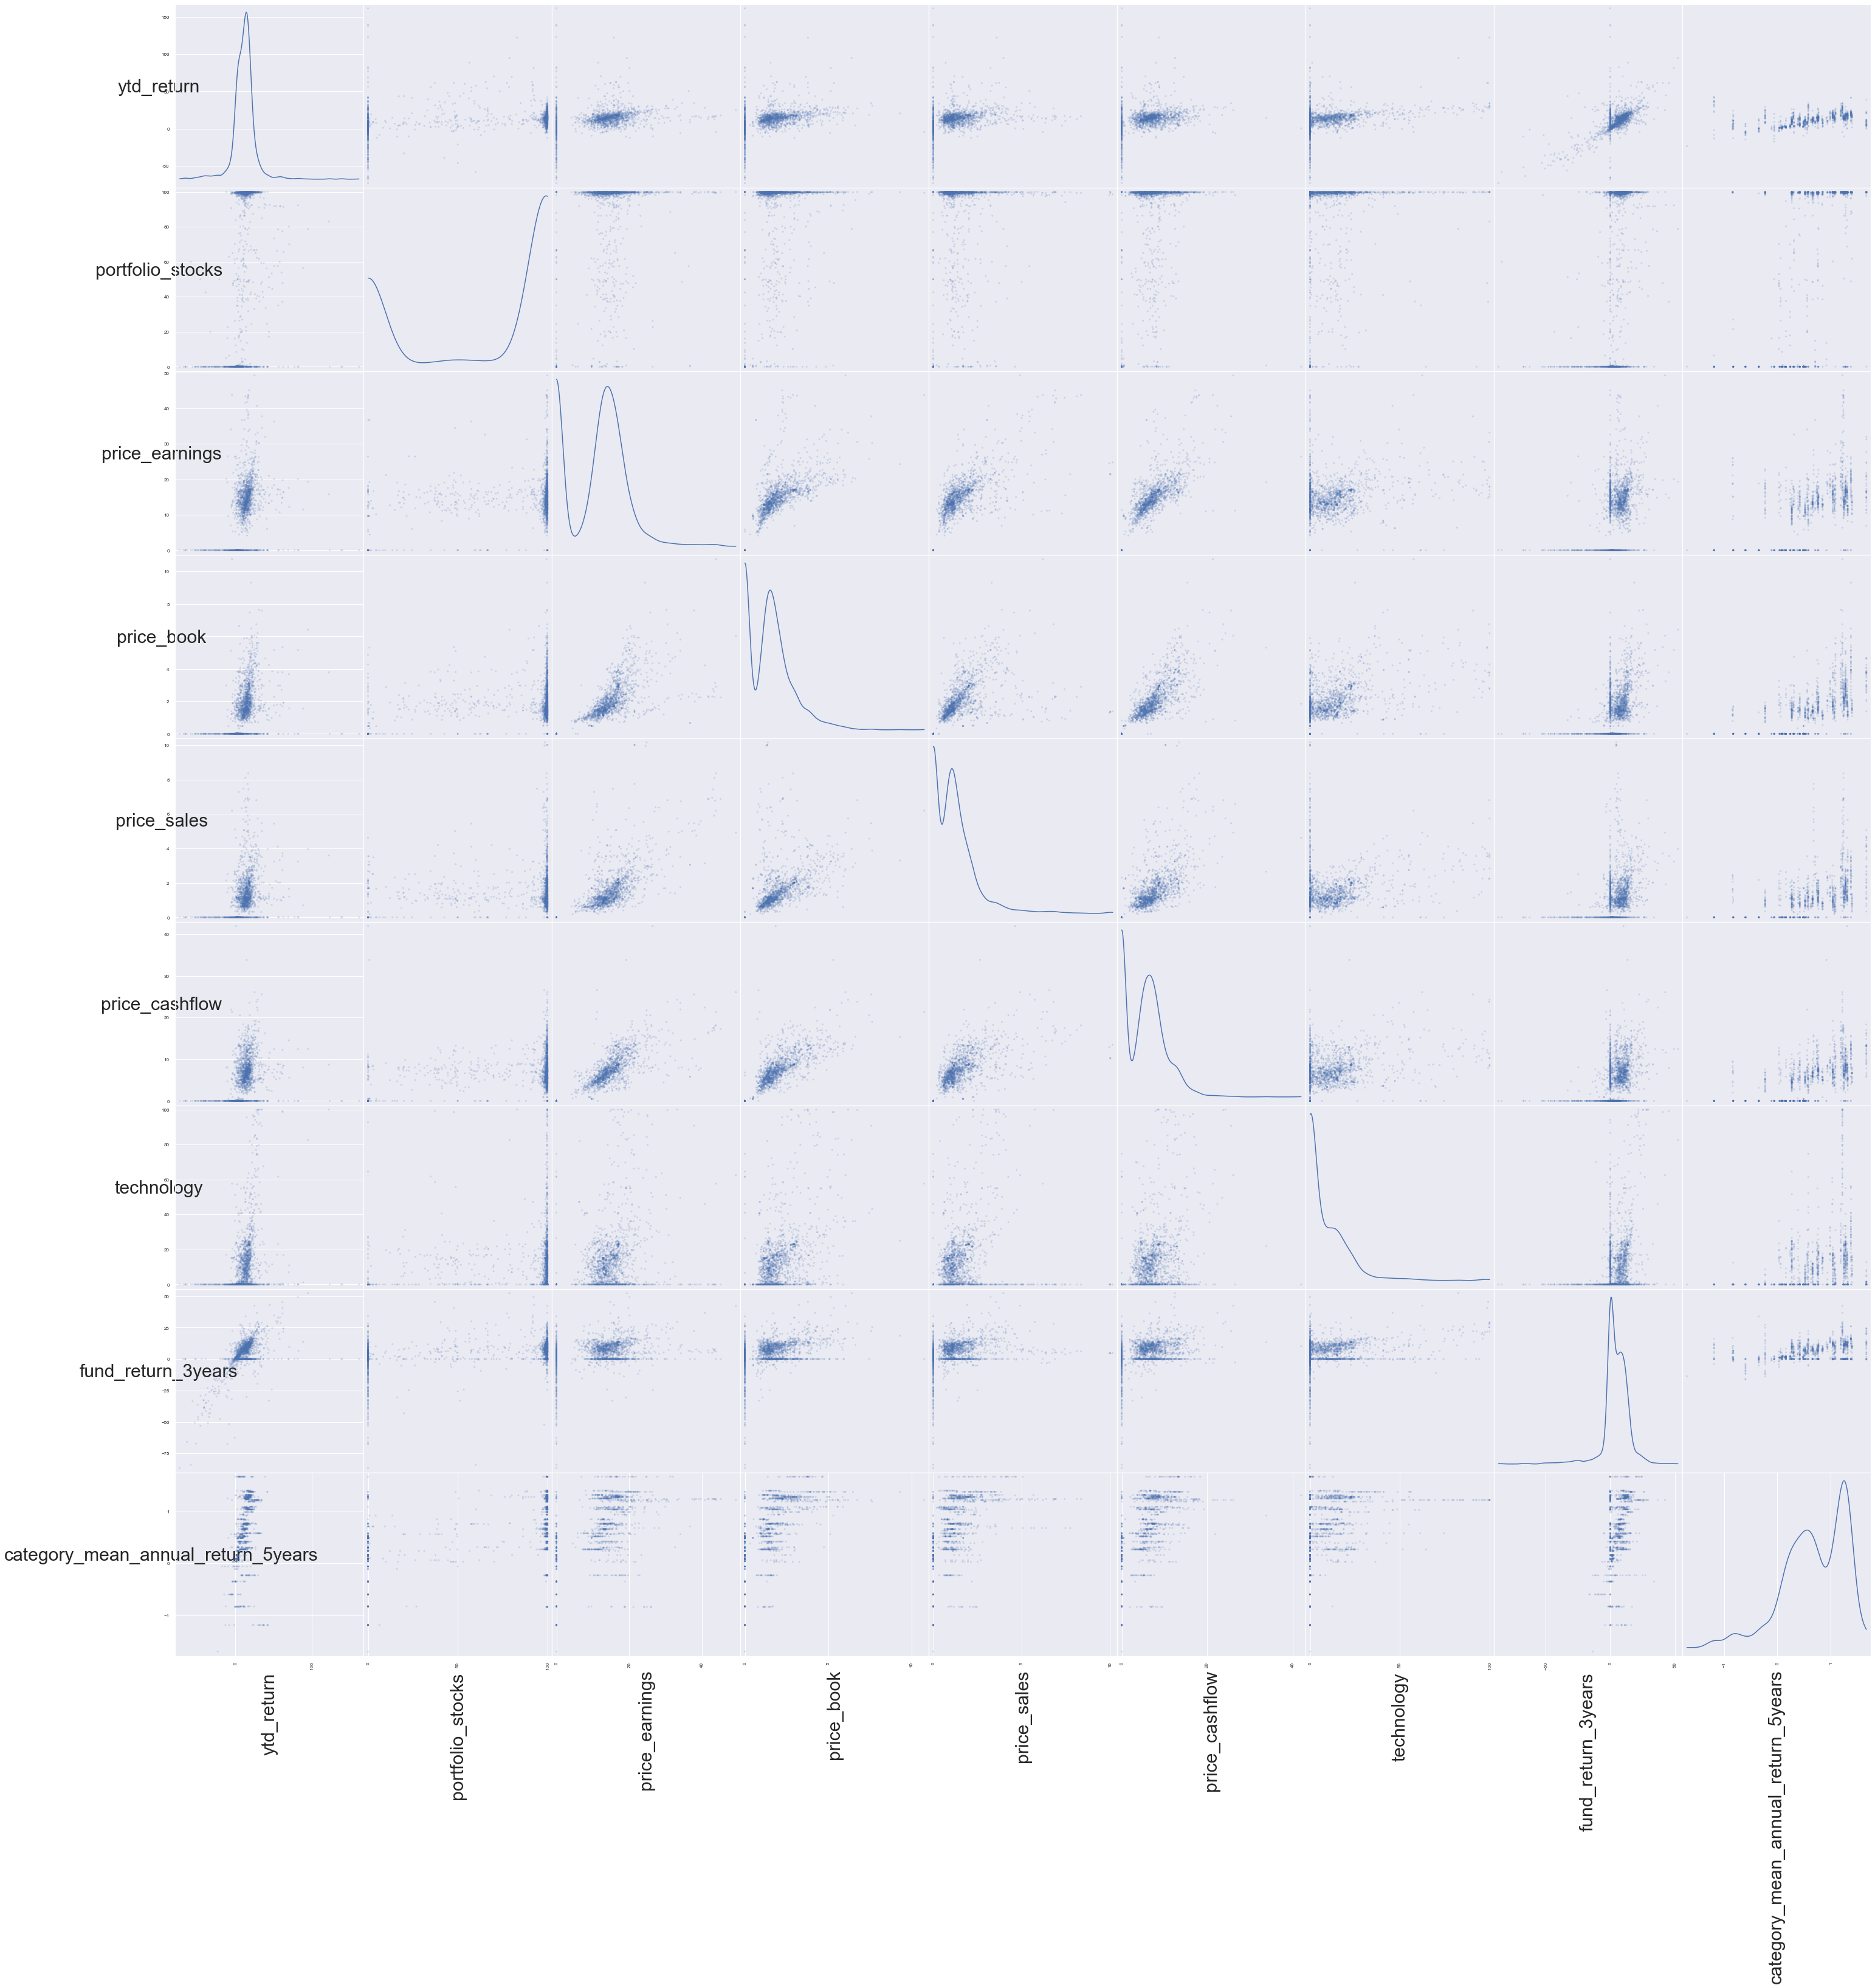

In [17]:
scatter_mtx(df_etf)

### MF Visualization

In [18]:
types(df_mf)

Str fund_name object
Str fund_extended_name object
Str category object
Str fund_family object
Num net_assets float64
Num ytd_return float64
Num fund_yield float64
Num morningstar_rating int64
Str inception_date object
Str investment object
Str size object
Str currency object
Num net_annual_expense_ratio_fund float64
Num net_annual_expense_ratio_category float64
Num portfolio_cash float64
Num portfolio_stocks float64
Num portfolio_bonds float64
Num portfolio_others float64
Num portfolio_preferred float64
Num portfolio_convertable float64
Str price_earnings object
Num price_book float64
Str price_sales object
Str price_cashflow object
Str median_market_cap object
Num basic_materials float64
Num consumer_cyclical float64
Num financial_services float64
Num real_estate float64
Num consumer_defensive float64
Num healthcare float64
Num utilities float64
Num communication_services float64
Num energy float64
Num industrials float64
Num technology float64
Num bond_maturity float64
Num bond_durat

In [19]:
describe(df_mf)

DataFrame summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25308 entries, 0 to 25307
Columns: 125 entries, fund_name to category_treynor_ratio_10years
dtypes: float64(109), int64(1), object(15)
memory usage: 24.1+ MB
None

Columns summary:
fund_name
count     25308
unique    25308
top       SMDQX
freq          1
Name: fund_name, dtype: object
SMDQX    1
EANDX    1
FRKSX    1
MAAIX    1
IPYSX    1
        ..
HEOAX    1
HSWTX    1
ASFCX    1
JHKCX    1
TRRDX    1
Name: fund_name, Length: 25308, dtype: int64

fund_extended_name
count                                                 25308
unique                                                25265
top       MainStay Funds Trust - MainStay Epoch Global C...
freq                                                      4
Name: fund_extended_name, dtype: object
MainStay Funds Trust - MainStay Epoch Global Choice Fund                           4
Northern Lights Fund Trust II - SFG Futures Strategy Fund                          4
MassMutua


real_estate
count    25193.000000
mean         4.928513
std         13.863994
min          0.000000
25%          0.000000
50%          1.550000
75%          4.440000
max        100.000000
Name: real_estate, dtype: float64
0.00      10331
2.50         75
3.73         67
100.00       65
2.51         63
          ...  
12.07         1
17.30         1
16.51         1
95.53         1
16.01         1
Name: real_estate, Length: 1404, dtype: int64

consumer_defensive
count    25193.000000
mean         5.113315
std          6.098919
min          0.000000
25%          0.000000
50%          4.840000
75%          7.880000
max        100.000000
Name: consumer_defensive, dtype: float64
0.00     8952
7.76       79
7.95       77
7.67       71
7.56       69
         ... 
14.91       1
5.27        1
30.59       1
15.33       1
33.50       1
Name: consumer_defensive, Length: 1555, dtype: int64

healthcare
count    25193.000000
mean         8.545386
std          9.677611
min          0.000000
25%        

 0.00     8574
 15.42      24
 15.14      24
 9.24       23
 13.11      21
          ... 
-2.53        1
-12.21       1
 27.51       1
 20.85       1
 19.81       1
Name: fund_return_10years, Length: 2280, dtype: int64

category_return_10years
count    25191.000000
mean         9.675278
std          4.932570
min        -24.990000
25%          6.440000
50%          9.970000
75%         14.120000
max         18.720000
Name: category_return_10years, dtype: float64
15.94    1345
14.54    1288
13.68    1132
4.56      970
11.79     951
         ... 
7.83       20
5.32       16
12.04      15
13.67      13
1.73        2
Name: category_return_10years, Length: 99, dtype: int64

fund_return_2018
count    24354.000000
mean        -6.687053
std          6.683230
min        -59.100000
25%        -10.520000
50%         -5.800000
75%         -1.620000
max         39.470000
Name: fund_return_2018, dtype: float64
 0.53     29
 0.14     29
-8.74     29
 0.31     29
-4.70     28
          ..
 7.19      1


count    25200.000000
mean         0.009071
std          0.005481
min         -0.020000
25%          0.010000
50%          0.010000
75%          0.010000
max          0.120000
Name: category_beta_10years, dtype: float64
 0.01    21287
 0.00     3170
 0.02      635
-0.02       55
 0.12       28
 0.03       25
Name: category_beta_10years, dtype: int64

fund_mean_annual_return_3years
count    23639.000000
mean         0.636010
std          0.435884
min         -3.190000
25%          0.330000
50%          0.620000
75%          0.890000
max          2.980000
Name: fund_mean_annual_return_3years, dtype: float64
 0.14    269
 0.80    268
 0.63    257
 0.62    256
 0.17    254
        ... 
 2.03      1
-1.48      1
-1.26      1
-0.84      1
-2.34      1
Name: fund_mean_annual_return_3years, Length: 389, dtype: int64

category_mean_annual_return_3years
count    25200.000000
mean         0.006511
std          0.005045
min         -0.020000
25%          0.000000
50%          0.010000
75%         

count    25200.000000
mean         0.040897
std          0.044466
min         -0.160000
25%          0.020000
50%          0.040000
75%          0.070000
max          0.320000
Name: category_treynor_ratio_5years, dtype: float64
 0.04    4576
 0.02    3642
 0.03    3086
 0.07    2293
 0.05    2143
 0.06    1666
 0.10    1345
 0.01    1331
 0.08    1291
 0.00    1140
 0.11     685
 0.12     464
-0.13     423
-0.10     233
-0.01     160
-0.09     144
 0.09     135
-0.04     109
-0.02      95
-0.08      78
-0.05      58
 0.32      51
 0.25      50
-0.16       2
Name: category_treynor_ratio_5years, dtype: int64

fund_treynor_ratio_10years
count     16622
unique     3167
top         7.7
freq         29
Name: fund_treynor_ratio_10years, dtype: object
7.7       29
14.92     25
13.42     23
7.42      23
12.37     22
          ..
14.86      1
15.39      1
8.93       1
16.89      1
149.86     1
Name: fund_treynor_ratio_10years, Length: 3167, dtype: int64

category_treynor_ratio_10years
count    2

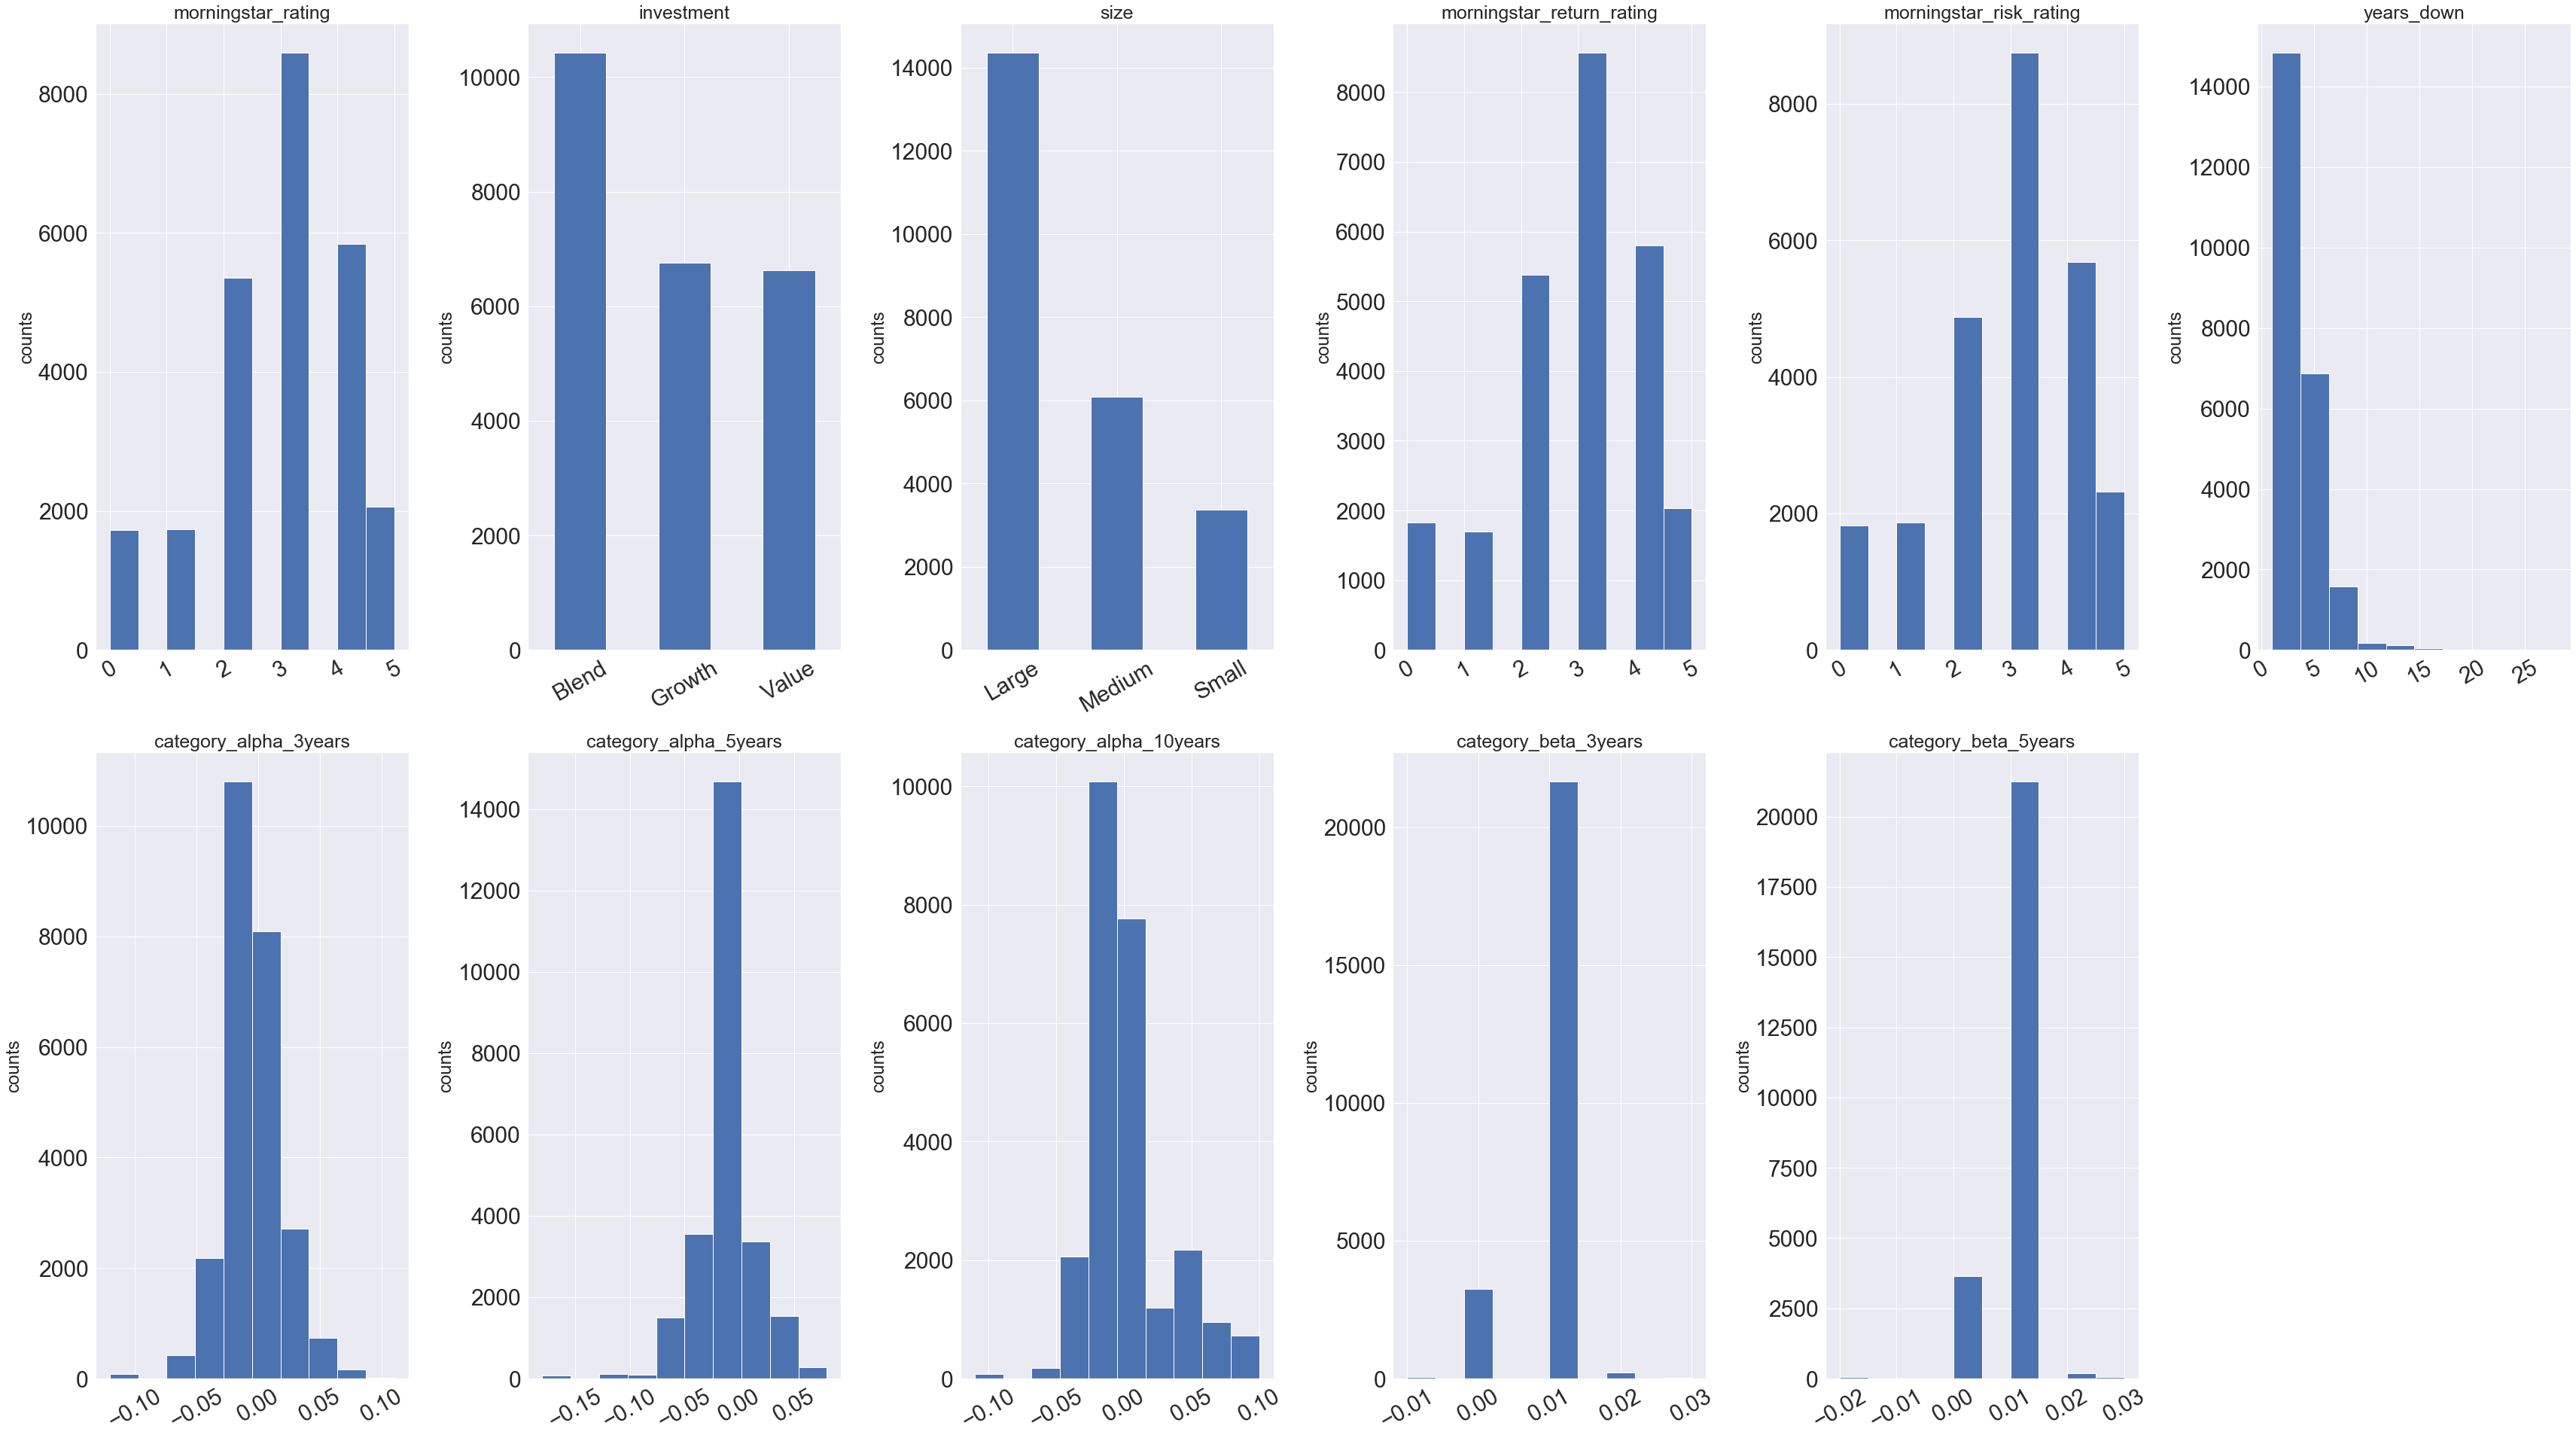

In [20]:
hist_bar_plot(df_mf)

In [21]:
df_mf = correlation_clean(df_mf, threshold=(-0.9, -0.6, 0.6, 0.9))

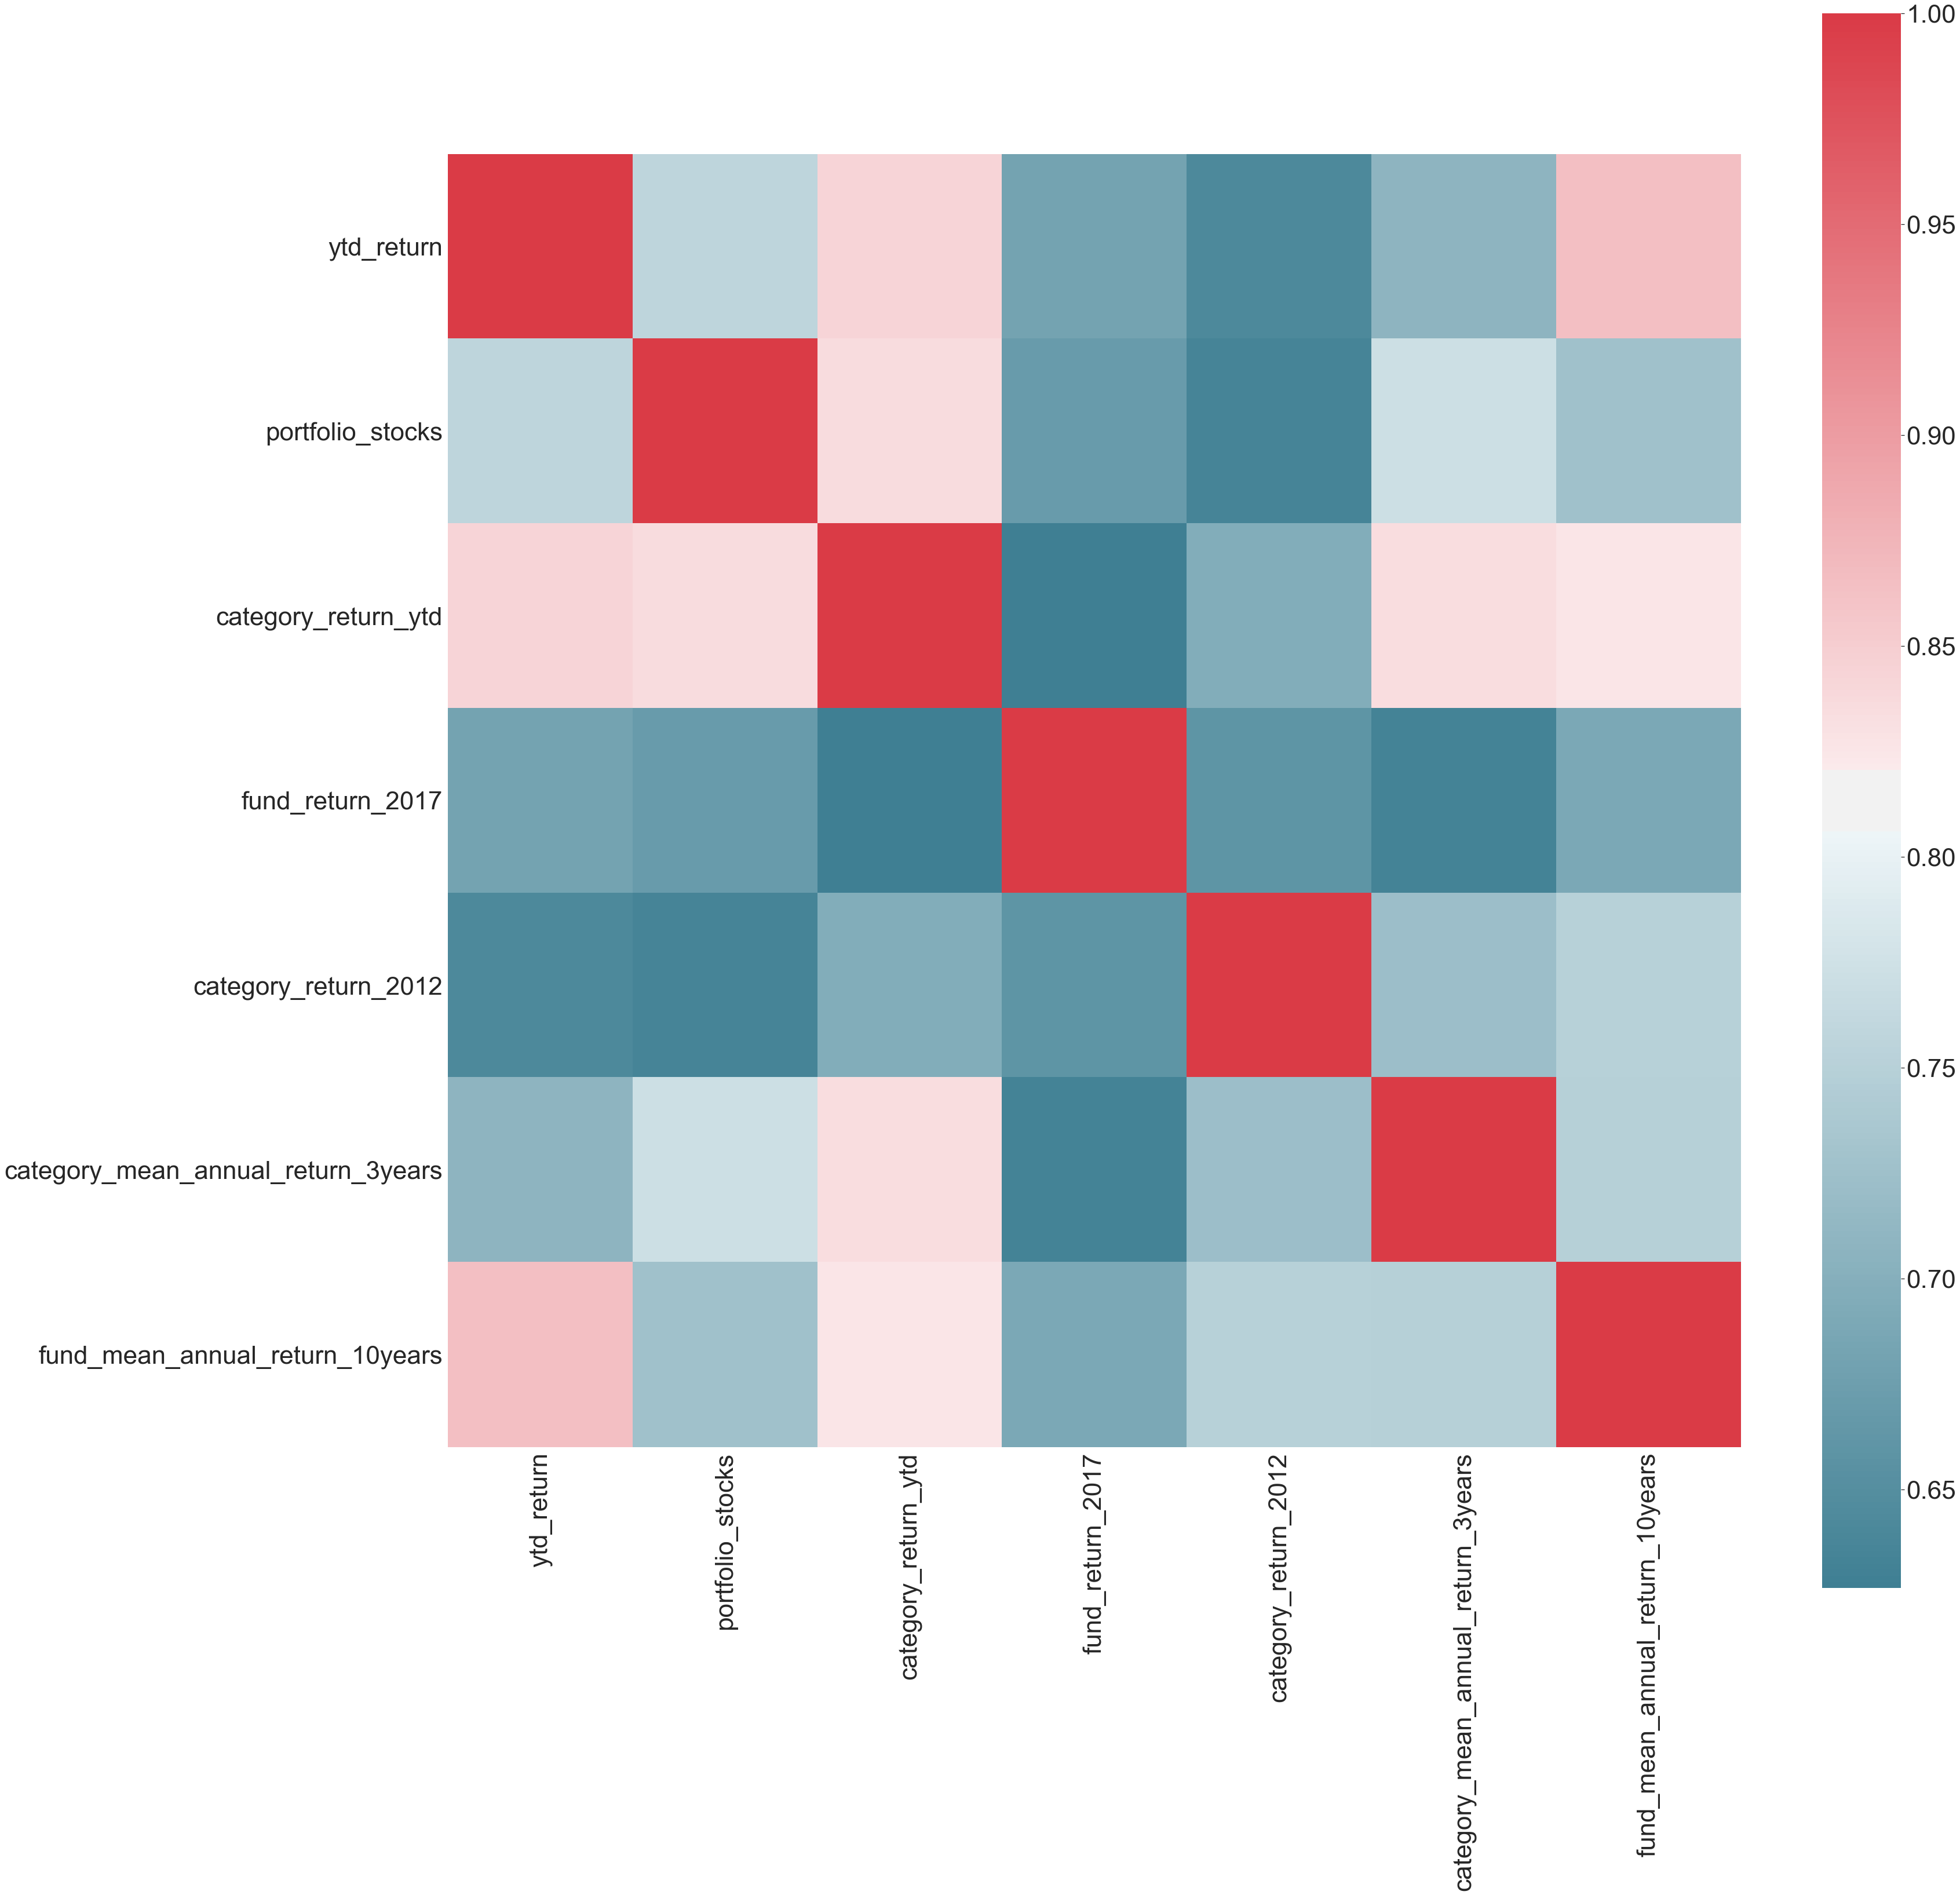

In [22]:
corr_mtx(df_mf, unique=False)

In [ ]:
scatter_mtx(df_mf, cap=20)

### Dataset Cleaning

In [ ]:
df_etf, df_mf = load_dataset() # Load again because of 'correlation_clean' function

In [ ]:
def gaussian_clean(df, dataset_type):
    """

    :param df:
    :param dataset_type: etf or mf.
    :return:
    """
    # Fix NaN
    df.replace('', 'NaN', inplace=True)
    df.replace('nan', 'NaN', inplace=True)
    df.replace('NaN', np.nan, inplace=True)

    # As consequence of too many NaN values
    migrate_columns = [
        'fund_treynor_ratio_3years',
    ]
    if dataset_type == 'etf':
        migrate_columns += [
            'category_treynor_ratio_5years',
        ]
    elif dataset_type == 'mf':
        migrate_columns += [
            'price_cashflow',
            'price_sales',
            'price_earnings',
            'median_market_cap',
            'fund_treynor_ratio_5years',
            'fund_treynor_ratio_10years',
        ]

    # Join together numerical columns
    num_mean = df.select_dtypes(np.number)
    for col in migrate_columns:
        num_mean = num_mean.join(pd.to_numeric(df[col], errors="coerce"))

    # Columns with low-value information (ignored during initial analysis)
    low_info_categorical_columns = [
        'category',
        'currency',
        'fund_extended_name',
        'fund_family',
        'fund_name',
    ]
    if dataset_type == 'etf':
        low_info_categorical_columns += [
            'legal_type',
        ]
    elif dataset_type == 'mf':
        low_info_categorical_columns += [
            'inception_date',
        ]

    # Join together categorical (without low-value) columns
    str_mean = df[df.columns.difference(num_mean.columns)]
    for col in low_info_categorical_columns:
        str_mean = str_mean.drop(col, axis=1)

    # Populate empty values in categorical columns
    for col in list(str_mean):
        unique = str_mean[col].unique()
        unique = [x for x in unique if str(x) != 'nan']
        for i, value in enumerate(str_mean[col]):
            if value is np.nan:
                choice = random.choice(unique)
                str_mean[col].iloc[i] = choice

    # Encode categorical columns
    le = LabelEncoder()
    for col in str_mean:
        df[col] = le.fit_transform(str_mean[col])

    # One-hot encode categorical columns
    ohe = OneHotEncoder()
    for col in str_mean:
        unique = str_mean[col].unique()
        unique = [col + "_" + x for x in unique if str(x) != 'nan']
        enc_df = pd.DataFrame(ohe.fit_transform(df[[col]]).toarray(), columns=unique)
        df = df.drop(col, axis=1)
        df = df.join(enc_df)

    mu = num_mean.quantile(0)
    sigma = num_mean.std(axis=0)
    for col in num_mean:
        stack = num_mean[col]
        null_stack = stack[pd.isnull(stack)]
        ran = np.random.normal(mu[col], sigma[col], len(null_stack))
        stack.loc[null_stack.index] = ran
        df[col] = stack.values

    # Clean
    df_dropped = pd.DataFrame()
    for col in low_info_categorical_columns:
        df_dropped[col] = df[col].copy()
        df = df.drop(col, axis=1)

    return df, df_dropped

In [ ]:
df_etf, df_etf_dropped = gaussian_clean(df_etf, 'etf')
   

In [ ]:
   
df_mf, df_mf_dropped = gaussian_clean(df_mf, 'mf')

### Visualize after cleaning

In [ ]:
hist_bar_plot(df_etf)

In [ ]:
hist_bar_plot(df_mf)

### Training

In [ ]:
regressors = [
    svm.SVR(),
    # linear_model.SGDRegressor(),
    # linear_model.BayesianRidge(),
    # linear_model.LassoLars(),
    # linear_model.ARDRegression(),
    # linear_model.PassiveAggressiveRegressor(),
    # linear_model.TheilSenRegressor(),
    linear_model.LinearRegression(),
]

In [ ]:
def dataset_split(df, index_col):
    train, test = train_test_split(df, test_size=0.2, random_state=rnd_seed_state)
    y_train = train[index_col].copy()
    del train[index_col]

    y_test = test[index_col].copy()
    del test[index_col]

    return train, test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = dataset_split(df_etf, index_col="ytd_return")

In [ ]:
def run_models(regressors, x_train, x_test, y_train, y_test):
    print("Running models...")
    for model in regressors:
        start_time = time.time()
        print("\tModel: {}".format(type(model).__name__))
        clf = model
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        result_metrics(y_test, y_pred)
        print("\tExecution time: %s seconds\n" % (round((time.time() - start_time), 3)))
        
def result_metrics(actual, predicted, print_adjust=50):
    evs = metrics.explained_variance_score(actual, predicted)
    print("\t\tExplained variance score ".ljust(print_adjust, '.') + " {}".format(evs))

    me = metrics.max_error(actual, predicted)
    print("\t\tMax error ".ljust(print_adjust, '-') + " {}".format(me))

    mae = metrics.mean_absolute_error(actual, predicted)
    print("\t\tMean absolute error ".ljust(print_adjust, '.') + " {}".format(mae))

    mse = metrics.mean_squared_error(actual, predicted)
    print("\t\tMean squared error ".ljust(print_adjust, '-') + " {}".format(mse))

    mae = metrics.median_absolute_error(actual, predicted)
    print("\t\tMedian absolute error ".ljust(print_adjust, '.') + " {}".format(mae))

    r2 = metrics.r2_score(actual, predicted)
    print("\t\tR² score, the coefficient of determination ".ljust(print_adjust, '-') + " {}".format(r2))

    mtd = metrics.mean_tweedie_deviance(actual, predicted)
    print("\t\tMean Poisson, Gamma, and Tweedie deviances: ".ljust(50, '.') + " {}".format(mtd))
    

In [ ]:
run_models(regressors, x_train, x_test, y_train, y_test)

In [ ]:
x_train, x_test, y_train, y_test = dataset_split(df_mf, index_col="ytd_return")

In [ ]:
run_models(regressors, x_train, x_test, y_train, y_test)